In [ ]:


with open("corpus.txt", 'r')  as Arquivo:
  Linhas = Arquivo.readlines()
  print(Linhas)

['Rafael\tJoao\tBia\tGiovana\tCaio\tHenrique\n', '@neymar\t@neymar\t@Beyonce\t@ProfCaio\t@profRafael\t@ProfCaio\n', '@LuanSantana\t@LuanSantana\t@DorivalJr\t@ProfDouglas\t@profHenrique\t@profHenrique\n', '@Pericles\t@Pericles\t@FDiniz\t@profHenrique\t@Unimar\t@profRafael\n', '@ProfCaio\t@ProfCaio\t@Cr7\t@Unimar\t@Unesp\t@Unimar\n', '@ProfDouglas\t@ProfDouglas\t@Messi\t@Unesp\t@Anitta\t@Unesp\n', '@profHenrique\t@profHenrique\t@LebronJames\t@Anitta\t@Rihana\t@Anitta\n', '@Unimar\t@Unimar\t@PaulMcCartney\t@Rihana\t@Beyonce\t@Rihana\n', '@Unesp\t@Unesp\t@profRafael\t@Beyonce\t@Cr7\t@Beyonce\n', '@Anitta\t@Anitta\t\t@Cr7\t@Messi\t@Cr7\n', '@Rihana\t@Rihana\t\t@Messi\t@LebronJames\t@Messi\n', '@Beyonce\t@Beyonce\t\t@LebronJames\t\t@LebronJames\n', '@DorivalJr\t@DorivalJr\t\t@PaulMcCartney\t\t\n', '@FDiniz\t@FDiniz\t\t@profRafael\t\t\n', '@Cr7\t@profRafael\t\t\t\t\n', '@Messi\t\t\t\t\t\n', '@LebronJames\t\t\t\t\t\n', '@PaulMcCartney\t\t\t\t\t\n']


In [ ]:
import re
import pandas as pd
import numpy as np

#dataframe = pd.DataFrame(data = Linhas)
#print(dataframe)

Linhas_Corrigidas = []

for itens in Linhas:
  Linhas_Corrigidas.append(re.sub("\n", "",itens))


#Criar uma lista vazia para armazenar os valores separados de cada coluna
Linhas_dataframe = []

#usar loop for para separar cada valor presente na coluna com base no
#caracter '\t' e armazenar cada valor no dataframe
for Linha in Linhas_Corrigidas:
  valor_linha = Linha.split('\t')
  Linhas_dataframe.append(valor_linha)


dataframe = pd.DataFrame(data = Linhas_dataframe[1:], columns=Linhas_dataframe[0])
dataframe.replace("", np.nan, inplace=True)

print(dataframe)

            Rafael           Joao             Bia         Giovana  \
0          @neymar        @neymar        @Beyonce       @ProfCaio   
1     @LuanSantana   @LuanSantana      @DorivalJr    @ProfDouglas   
2        @Pericles      @Pericles         @FDiniz   @profHenrique   
3        @ProfCaio      @ProfCaio            @Cr7         @Unimar   
4     @ProfDouglas   @ProfDouglas          @Messi          @Unesp   
5    @profHenrique  @profHenrique    @LebronJames         @Anitta   
6          @Unimar        @Unimar  @PaulMcCartney         @Rihana   
7           @Unesp         @Unesp     @profRafael        @Beyonce   
8          @Anitta        @Anitta             NaN            @Cr7   
9          @Rihana        @Rihana             NaN          @Messi   
10        @Beyonce       @Beyonce             NaN    @LebronJames   
11      @DorivalJr     @DorivalJr             NaN  @PaulMcCartney   
12         @FDiniz        @FDiniz             NaN     @profRafael   
13            @Cr7    @profRafael 

In [ ]:
import numpy as np

# Função para ler o arquivo e extrair os dados
def ler_arquivo(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
        header = lines[0].strip().split('\t')
        data = [line.strip().split('\t') for line in lines[1:]]
    return header, data

# Função para criar a matriz de incidência
def criar_matriz_incidencia(header, data):
    # Criar uma lista de todas as entidades únicas mencionadas pelos usuários
    entidades = set()
    for row in data:
        for entity in row:
            if entity:
                entidades.add(entity)
    entidades = list(entidades)

    # Inicializar a matriz de zeros
    num_entidades = len(entidades)
    num_usuarios = len(header)
    matriz_incidencia = np.zeros((num_entidades, num_usuarios), dtype=int)

    # Preencher a matriz de incidência
    for i, entidade in enumerate(entidades):
        for j, usuario in enumerate(header):
            for row in data:
                if j < len(row) and entidade == row[j]:
                    matriz_incidencia[i, j] = 1
                    break

    return entidades, matriz_incidencia

# Caminho para o arquivo
filepath = '/mnt/data/corpus.txt'

# Ler o arquivo
header, data = ler_arquivo(filepath)

# Criar a matriz de incidência
entidades, matriz_incidencia = criar_matriz_incidencia(header, data)

# Exibir os resultados
print("Usuários:", header)
print("Entidades:", entidades)
print("Matriz de Incidência:")
print(matriz_incidencia)


ID        Bia  Caio  Giovana  Henrique  Joao  Rafael
ID                                                  
Bia         0     5        6         5     4       7
Caio        5     0       10        10     7       9
Giovana     6    10        0        11     9      12
Henrique    5    10       11         0     8      10
Joao        4     7        9         8     0      13
Rafael      7     9       12        10    13       0


Values          @Anitta  @Beyonce  @Cr7  @DorivalJr  @FDiniz  @LebronJames  \
Values                                                                       
@Anitta               0         5     4           2        2             4   
@Beyonce              5         0     5           3        3             5   
@Cr7                  4         5     0           2        2             5   
@DorivalJr            2         3     2           0        3             2   
@FDiniz               2         3     2           3        0             2   
@LebronJames          4     

In [ ]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.9 MB/s eta 0:00:00


# Grafo de Incidencia com a lib Igraph

In [ ]:
!pip install python-igraph
!pip install cairocffi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 1.8 MB/s eta 0:00:00


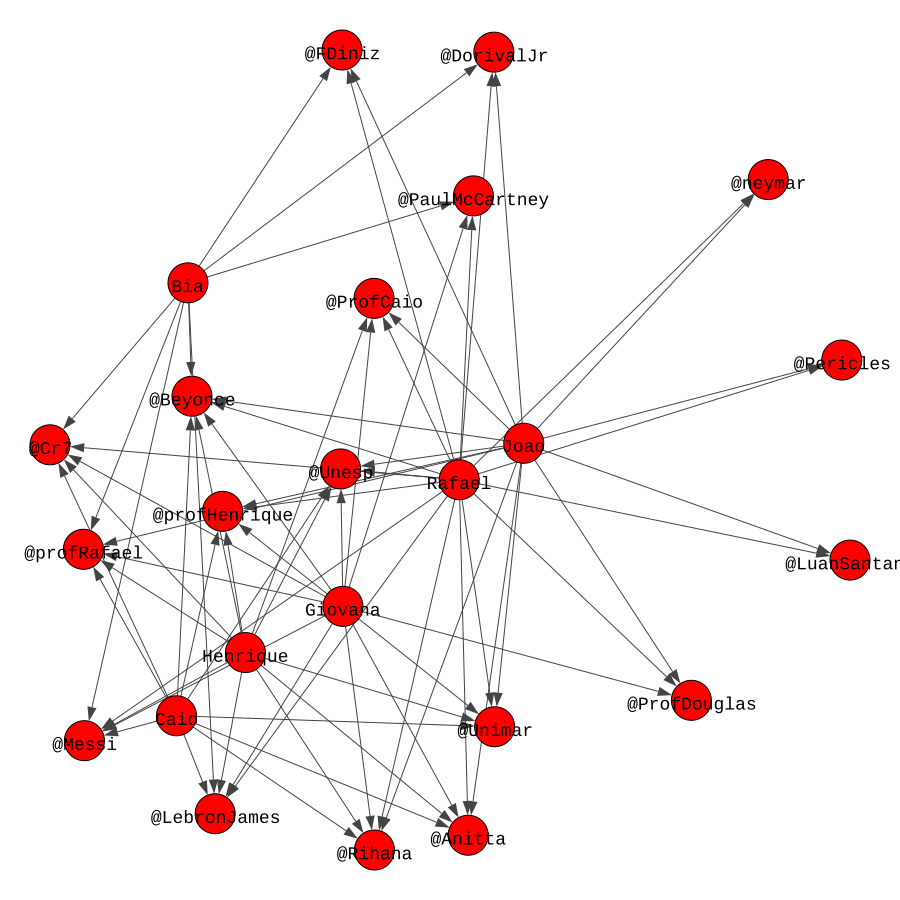

In [ ]:
import igraph as ig
from igraph import Graph
import cairocffi as cairo

nomes = tabela_frequencia.index

indices = nomes

# Criando o grafo_inc
grafo_inc = ig.Graph(directed = True)

# Adicionando os vértices (usuários e perfis)
usuarios = list(tabela_frequencia.index)
perfis = list(tabela_frequencia.columns)

grafo_inc.add_vertices(usuarios + perfis)

# Adicionando arestas com pesos
edges = []
weights = []

for usuario in usuarios:
    for perfil in perfis:
        if tabela_frequencia.loc[usuario, perfil] != 0:
            edges.append((usuario, perfil))
            weights.append(tabela_frequencia.loc[usuario, perfil])

grafo_inc.add_edges(edges)
grafo_inc.es['weight'] = weights



# Estabelecendo o nome dos vértices
grafo_inc.vs["label"] = grafo_inc.vs["name"]

# Definindo estilos de visualização
visual_style = {
    "vertex_size": 40,
    "vertex_label_size": 18,
    "edge_width": [weight for weight in grafo_inc.es["weight"]],
    "bbox": (900, 900),
    "margin": 50
}

# Plotando o grafo_inc
ig.plot(grafo_inc, target="grafo_inc.svg", **visual_style)





# Grafo de Similaridade Com a lib Igraph

In [ ]:
!pip install igraph

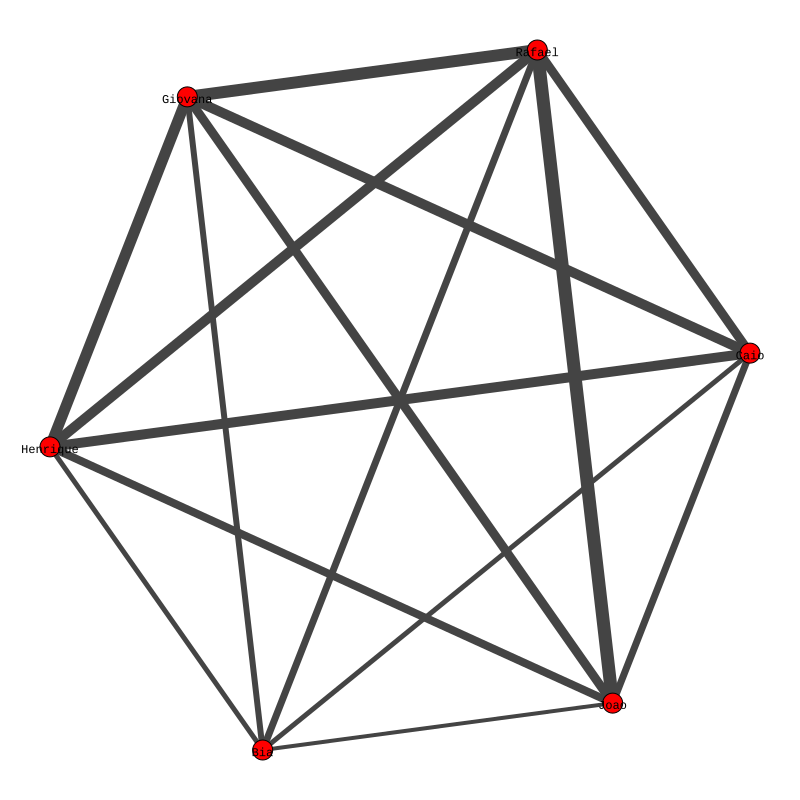

In [ ]:
import igraph as ig
from igraph import Graph



indices = tabela_frequencia.index

#Criando o Grafo
grafo_sim = ig.Graph()


#Adicionando os vertices
for nome in indices:
  grafo_sim.add_vertices(nome)

#Adicionando as arestas
for i in range(len(indices)):
  for j in range(i+1, len(indices)):
    if df_sim.values[i, j] != 0:
      grafo_sim.add_edge(indices[i], indices[j], value=df_sim.values[i, j])



#Estabelecendo o nome dos vertices.
grafo_sim.vs["label"] = indices

#Eetabelecendo o peso das arestas:
grafo_sim.es["weight"] = [df_sim.values[i, j] for i in range(len(indices)) for j in range(i + 1, len(indices)) if df_sim.values[i, j] != 0]


aresta_peso = [edge['weight'] for edge in grafo_sim.es]

estilo = {
    "vertex_size": 20,
    "vertex_label_size": 12,
    "edge_width": aresta_peso,
    "bbox": (800, 800),
    "margin": 50
}

ig.plot(grafo_sim, target="grafo_sim.svg", **estilo)

# Grafo de Coocorrência usando a lib IGRAPH

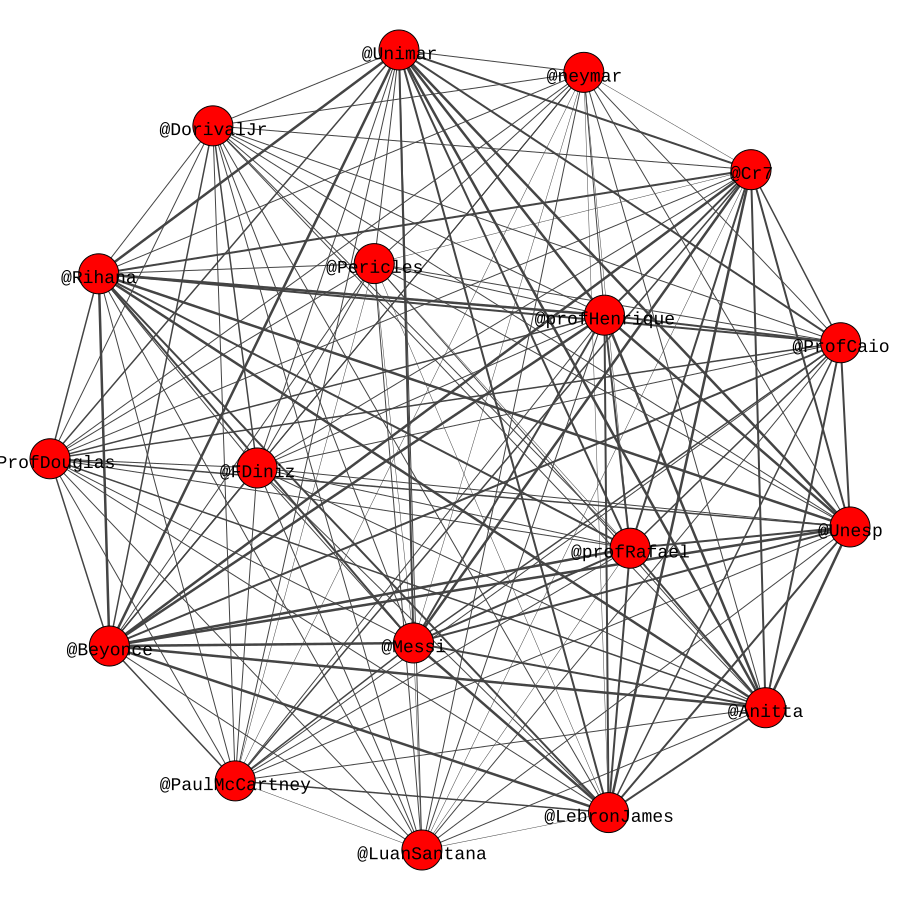

In [ ]:
import igraph as ig
from igraph import Graph
import matplotlib.pyplot as plt

# Criando o grafo_co
grafo_co = ig.Graph(directed = False)

# Adicionando os vértices (usuários e perfis)
perfis = list(df_co.index)

for perfil in perfis:
  grafo_co.add_vertices(perfil)

# Adicionando arestas com pesos
arestas = []
weights = []

#Loop para buscar cada valor dentro da lista perfis, e enumerando os itens ou perfis achados
for i, perfil1 in enumerate(perfis):
  #Segundo loop para buscar cada valor de destino da aresta da lista perfis, e enumerando os itens
    for j, perfil2 in enumerate(perfis):
      #O if criado estabelece que se os indices de perfil1 forem menores que do perfil 2
      #e os valores localizados no dataframe com base no indice e coluna foram diferentes de zero
      #o sera feito o adicionamento da aresta na lista edges
        if i < j and df_co.loc[perfil1, perfil2] != 0:
            arestas.append((perfil1, perfil2))
            weights.append(df_co.loc[perfil1, perfil2])

grafo_co.add_edges(arestas)
grafo_co.es['weight'] = weights



# Estabelecendo o nome dos vértices
grafo_co.vs["label"] = grafo_co.vs["name"]

# Definindo estilos de visualização
visual_style = {
    "vertex_size": 40,
    "vertex_label_size": 18,
    "bbox": (900, 900),
    "edge_width": [weight / 2 for weight in grafo_co.es["weight"]],
    "margin": 50
}

# Plotando o grafo_co
ig.plot(grafo_co, target="grafo_co.svg", **visual_style)







In [ ]:
#Exibe um sumario do grafo_co, mostrando a quantidade de vertices e arestas presentes
print(grafo_inc.summary())
print("\n")

print(grafo_sim.summary())
print("\n")

print(grafo_co.summary())
print("\n")

print()

IGRAPH DNW- 24 73 -- 
+ attr: label (v), name (v), weight (e)


IGRAPH UNW- 6 15 -- 
+ attr: label (v), name (v), value (e), weight (e)


IGRAPH UNW- 18 153 -- 
+ attr: label (v), name (v), weight (e)


0 7
0 8
0 9
0 10
0 11
0 13
0 14
0 23
1 6
1 7
1 8
1 11
1 13
1 18
1 19
1 20
1 22
1 23
2 6
2 7
2 8
2 11
2 13
2 14
2 16
2 17
2 18
2 19
2 20
2 22
2 23
3 6
3 7
3 8
3 11
3 13
3 16
3 18
3 19
3 20
3 22
3 23
4 6
4 7
4 9
4 10
4 12
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22


# OUTRO

In [ ]:
#Construção do Grafo de Similaridade

n_vertices = len(tabela_frequencia.index)

arestas = mtx_sim

g_sim = ig.Graph(n_vertices, arestas)

#Definindo os Atributos para o grafo
g_sim['titulo'] = "Grafo de Similaridade"
g_sim.vs['nome'] = tabela_frequencia.index
g_sim.es['peso'] = [True, True, True, True, True, True]


6


# Teste Com A Biblioteca PyVis

In [ ]:
from pyvis.network import Network
import jinja2
from IPython.core.display import display, HTML

indices = tabela_frequencia.index

#Criando o Grafo
net = Network()

#Adicionando os vertices
for nome in indices:
  net.add_node(nome, label=nome)

#Adicionando as arestas
for i in range(len(indices)):
  for j in range(i+1, len(indices)):
    if df_sim.values[i, j] != 0:
      net.add_edge(indices[i], indices[j], value=df_sim.values[i, j])


#Gerando o HTML interativo

net.show("graph.html")

# Exibir o HTML no Google Colab
display(net)